In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch

In [4]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.sample(5)#случайные 5 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S


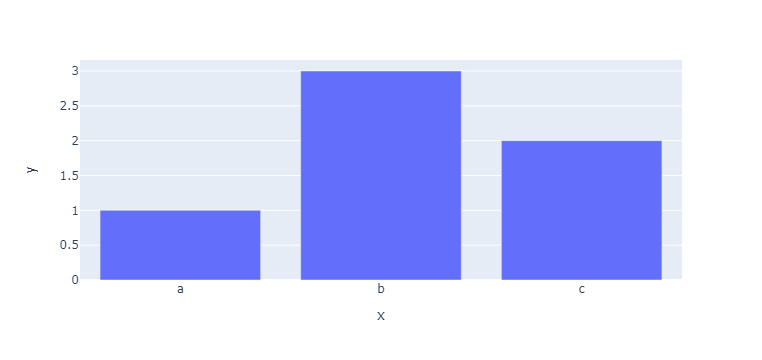

In [249]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [250]:
df['Sex'].iplot(kind='hist', xTitle='claps',
                  yTitle='count', title='Claps Distribution')

NameError: name 'df' is not defined

In [251]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [252]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
# в частности, избавимся от столбца Cabin 
df_train.drop(labels = 'Cabin', axis = 1, inplace = True)
# заполним пропуски в столбце Age медианным значением
df_train.Age.fillna(df_train.Age.median(), inplace = True)
# два пропущенных значения в столбце Embarked заполним портом Southhampton
df_train.Embarked.fillna('S', inplace = True)
# проверим результат (найдем общее количество пропусков сначала по столбцам, затем по строкам)
df_train.isnull().sum().sum()

0

In [254]:
t=df_train.Survived.unique()
print(t)

[0 1]


In [255]:
t=df_train.Survived.value_counts()
print(t)

0    549
1    342
Name: Survived, dtype: int64


In [256]:
titanic=df_train.copy()
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
45,46,0,3,"Rogers, Mr. William John",male,28.0,0,0,S.C./A.4. 23567,8.05,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.50,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.00,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.00,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.00,S


In [259]:
from pandasql import sqldf
print(
    (titanic[['PassengerId','Age']][(titanic['Survived']==1)&(titanic['Pclass']==2)]).head(1))
t=sqldf('select PassengerId from titanic where Survived=1 and Pclass=2 limit 1 ',locals())
print(type(t))

   PassengerId   Age
9           10  14.0
<class 'pandas.core.frame.DataFrame'>


In [ ]:
meanvalue=titanic['Age'].mean()


In [171]:
tit=titanic.query('Name.str.contains("Miss")', engine='python')['Name'].head(10)
print(tit)

2                   Heikkinen, Miss. Laina
10         Sandstrom, Miss. Marguerite Rut
11                Bonnell, Miss. Elizabeth
14    Vestrom, Miss. Hulda Amanda Adolfina
22             McGowan, Miss. Anna "Annie"
24           Palsson, Miss. Torborg Danira
28           O'Dwyer, Miss. Ellen "Nellie"
32                Glynn, Miss. Mary Agatha
38      Vander Planke, Miss. Augusta Maria
39             Nicola-Yarred, Miss. Jamila
Name: Name, dtype: object


# Решим задачи

In [172]:
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [175]:
# 33. Прочитать файл CSV и перевести его в DataFrame
 
df = pd.read_csv('https://raw.githubusercontent.com/Grossmend/CSV/master/titanic/data.csv')

<class 'pandas.core.frame.DataFrame'>


In [226]:
# 35. Прочитать файл CSV и перевести каждую 100-ую строку в DataFrame
 
df = pd.read_csv('https://raw.githubusercontent.com/Grossmend/CSV/master/titanic/data.csv', chunksize=100)
df_each = pd.DataFrame()
for chunk in df:
    t=chunk.iloc[0,:]
    df_new=pd.DataFrame(data=dict(zip(t.index,t.values)),index=[0])
    df_each=pd.concat([df_each,df_new])
df_each.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
0,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
0,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
0,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
0,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S


In [261]:
df = pd.read_csv('https://raw.githubusercontent.com/Grossmend/CSV/master/titanic/data.csv')
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
tr=df.groupby('Title').median()['Age']
t=sqldf('select tr.Age from tr inner join df using(Title)',locals())
df['Age']=t
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

# sql-ex

In [293]:
df_train=pd.read_csv('train.csv')
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S


In [5]:
for i in range(5,0,-1):
    print(i)

5
4
3
2
1


In [241]:
Solution().findCircleNum([[1,1,0,0,0,0,0,1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,1,1,0,0,0,0],[0,0,0,1,0,1,0,0,0,0,1,0,0,0,0],[0,0,0,1,0,0,1,0,1,0,0,0,0,1,0],[1,0,0,0,0,0,0,1,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,1,1,0,0,0,0,1,0],[0,0,0,0,1,0,0,0,0,1,0,1,0,0,1],[0,0,0,0,1,1,0,0,0,0,1,1,0,0,0],[0,0,0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,1,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0,1]])

15
[{0, 1, 7}]
[{0, 1, 7}]
[{0, 1, 7}, {2}]
[{0, 1, 7}, {2}, {3, 5, 6}]
[{0, 1, 7}, {2}, {3, 5, 6}, {9, 10, 4}]
[{0, 1, 7}, {2}, {3, 4, 5, 6, 9, 10}]
[{0, 1, 7}, {2}, {3, 4, 5, 6, 8, 9, 10, 13}]
[{0, 1, 7, 8}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 13}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 13}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14}, {12}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14}, {12}]
[{0, 1, 6, 7, 8, 13}, {2}, {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14}, {12}]


4

In [50]:
class Node:
    def __init__(self,indx):
        self.indx=[indx]
    def __eq__(self,other):
        return other in self.indx
class Solution:
    def findCircleNum(self, isConnected):
        n=len(isConnected)
        li=[]
        for i in range(n):
            tup=tuple(filter(lambda x: x==i,li))
            if len(tup):
                tup=tup[0]
            else:
                tup=Node(i)
                li.append(tup)
            for q in range(i+1,n):
                if q==tup or not isConnected[i][q]:
                    continue
                q_tup=tuple(filter(lambda x: x==q,li))
                if len(q_tup):
                    q_tup=q_tup[0]
                    li.remove(tup)
                    tup.indx=tup.indx+q_tup.indx
                    li.append(tup)
                    li.remove(q_tup)
                else:
                    tup.indx.append(q)
        return len(li)
            
            
                    



TypeError: unhashable type: 'set'

In [312]:
import pandas as pd

def department_highest_salary(employee: pd.DataFrame, department: pd.DataFrame) -> pd.DataFrame:
    merged=employee.merge(department,how='inner',left_on='departmentId',right_on='id')[['name_y','name_x','salary']]
    #merged=merged[merged['name_y']['salary']==merged.groupby('name_y').aggregate('max')['IT']]
    merged=merged.query('salary==max(salary)')
    return merged

In [314]:
def relevance(q, d):
	return -(q[0] - d[0])**2 - 2*((q[1] - d[1])**2)

docs = [
	(0.0, 1.0),
	(1.0, 0.0),
	(1.0, 0.5),
]

q = (1, 1)

for doc in docs:
	print("relevance", relevance(q, doc))

relevance -1.0
relevance -2.0
relevance -0.5
